In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data_dir = 'images'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

In [3]:
# Image Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    zoom_range=0.2, 
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

#Apply train_datagen and validation_datagen on Traing & testing generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',#B'coz Multi-Class classification
    color_mode='grayscale'
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',#B'coz Multi-Class classification
    color_mode='grayscale'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


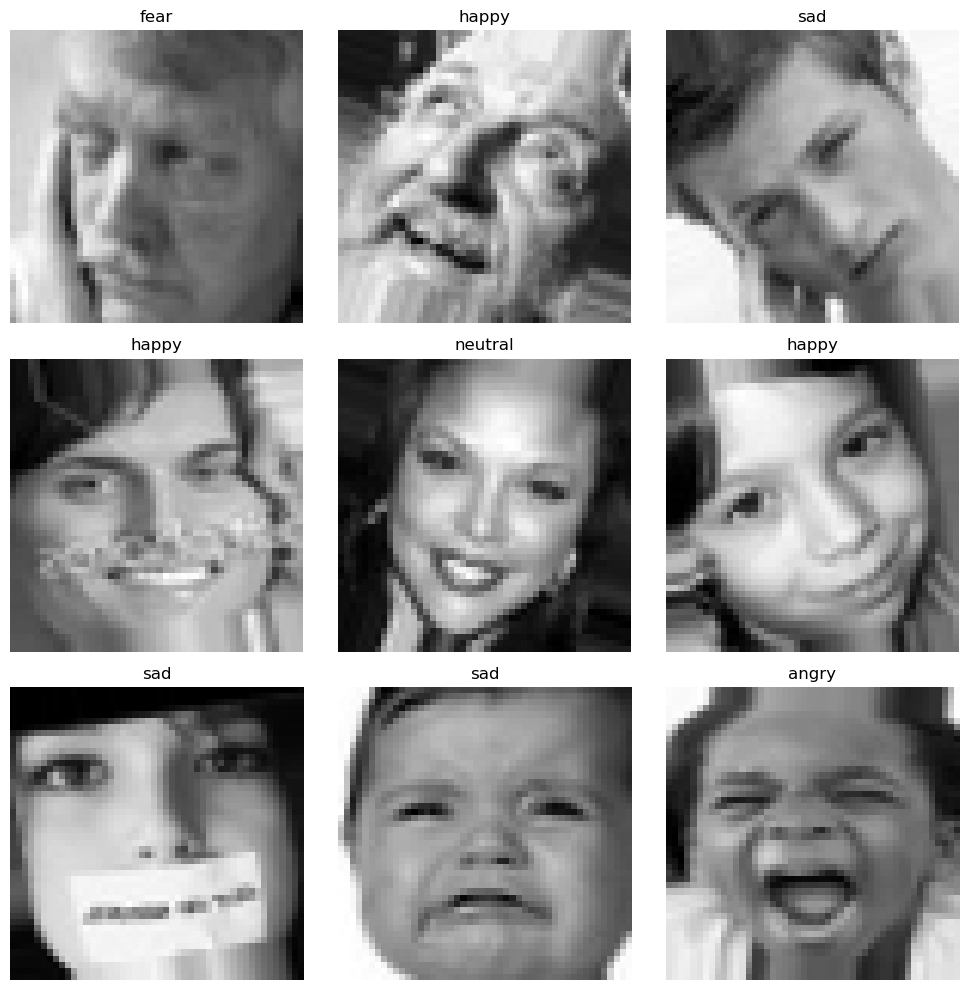

In [4]:
class_names = list(train_generator.class_indices.keys())
print(class_names)#['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
images, labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48, 48), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# 3. CNN Model Architecture
model = Sequential([
    #CNN has 2 stpe: 1)convolution layer 2)fully conntected
    #a)1)convolution layer
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    #2D to 1D
    Flatten(),
    #Fully conntected layer
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(7, activation='softmax')#Multi-class output, hence 7 and softmax
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\udana\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [8]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Model Training
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 210s 464ms/step - accuracy: 0.4976 - loss: 1.3193 - val_accuracy: 0.4693 - val_loss: 1.3942 - learning_rate: 0.0010
Epoch 2/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 202s 447ms/step - accuracy: 0.5030 - loss: 1.3136 - val_accuracy: 0.5477 - val_loss: 1.1977 - learning_rate: 0.0010
Epoch 3/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 201s 446ms/step - accuracy: 0.5079 - loss: 1.2924 - val_accuracy: 0.5521 - val_loss: 1.1980 - learning_rate: 0.0010
Epoch 4/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 201s 445ms/step - accuracy: 0.5181 - loss: 1.2781 - val_accuracy: 0.4837 - val_loss: 1.3319 - learning_rate: 0.0010
Epoch 5/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 202s 447ms/step - accuracy: 0.5231 - loss: 1.2547 - val_accuracy: 0.5793 - val_loss: 1.1163 - learning_rate: 0.0010
Epoch 6/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 201s 446ms/step - accuracy: 0.5361 - loss: 1.2207 - val_accuracy: 0.5497 - val_loss: 1.2120 - learning_rate: 0.0010
Epoch 7/40
451/451 ━━━━━━━━━━━━━━━━━━━━ 200s 444ms/step - accura

In [9]:
# 6. Evaluation - Classification Report & Confusion Matrix
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
print(cm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step 
              precision    recall  f1-score   support

       angry       0.73      0.67      0.70        12
     disgust       0.00      0.00      0.00         0
        fear       0.33      0.20      0.25         5
       happy       1.00      0.94      0.97        17
     neutral       0.65      1.00      0.79        13
         sad       0.50      0.30      0.38        10
    surprise       0.86      0.86      0.86         7

    accuracy                           0.73        64
   macro avg       0.58      0.57      0.56        64
weighted avg       0.73      0.73      0.72        64

[[ 8  1  0  0  2  1  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  1  2  1]
 [ 1  0  0 16  0  0  0]
 [ 0  0  0  0 13  0  0]
 [ 2  0  1  0  4  3  0]
 [ 0  0  1  0  0  0  6]]


C:\Users\udana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\udana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\udana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


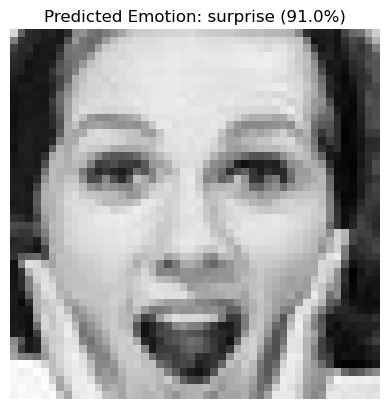

Emotion: surprise, Confidence: 91.0%


In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Example Detection
predicted_emotion, confidence = detect_emotion('images/train/surprise/10011.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")

In [1]:
print(detect_emotion('images/train/happy/10005.jpg'))

NameError: name 'detect_emotion' is not defined

In [12]:
model.save('facial_expressions_model.h5')

In [2]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('facial_expressions_model.h5')

# Define the class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [3]:
from tensorflow.keras.preprocessing import image

def predict_emotion(img_path):
    img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    return class_names[predicted_index]


Found 28821 images belonging to 7 classes.


C:\Users\udana\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


901/901 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step


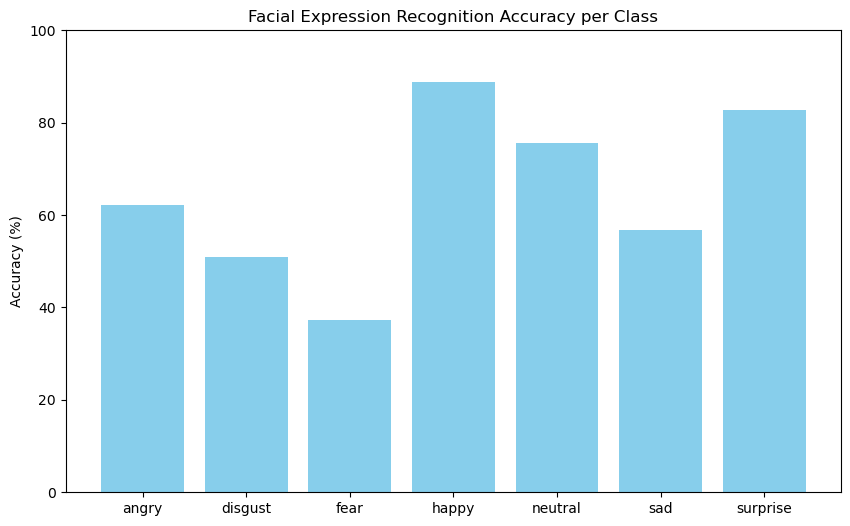

In [9]:
# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'images/train/',                
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict on all test images
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate accuracy per class
accuracy_per_class = []
for i, label in enumerate(class_labels):
    idx = np.where(true_classes == i)[0]
    acc = np.sum(predicted_classes[idx] == i) / len(idx)
    accuracy_per_class.append(acc)

# Plotting
plt.figure(figsize=(10,6))
plt.bar(class_labels, [a*100 for a in accuracy_per_class], color='skyblue')
plt.ylabel("Accuracy (%)")
plt.title("Facial Expression Recognition Accuracy per Class")
plt.ylim(0, 100)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


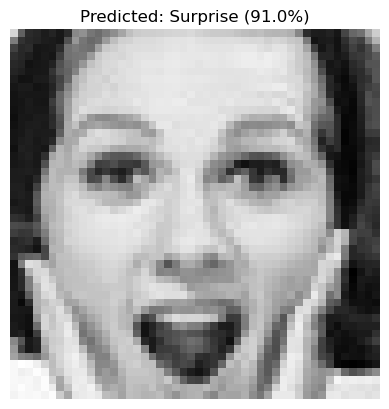

Emotion: Surprise, Confidence: 91.0%


In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

#  Load your saved model
model = load_model('facial_expressions_model.h5')

#  Define class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

#  Function to predict emotion from a single image
def detect_emotion(img_path):
    # Load image in grayscale, 48x48
    img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence %

    # Display image with predicted label
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

#  Test on a single image
image_path = 'images/train/surprise/10011.jpg' 
predicted_emotion, confidence = detect_emotion(image_path)
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


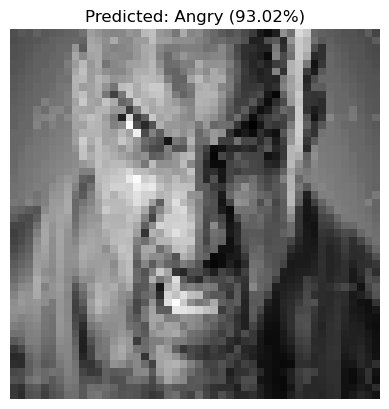

Emotion: Angry, Confidence: 93.02%


In [13]:
# Example with another image
image_path = 'images/test/angry.jpeg'
predicted_emotion, confidence = detect_emotion(image_path)
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")